In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
mart=pd.read_csv("bigmart1.csv")

In [3]:
mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
mart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# checking the datatype of each columns

In [5]:
def datainfo():
    
    temp_ps = pd.DataFrame(index=mart.columns)
    temp_ps['DataType'] = mart.dtypes
    temp_ps["Non-null_Values"] = mart.count()
    temp_ps['Unique_Values'] = mart.nunique()
    temp_ps['NaN_Values'] = mart.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(mart))*100 
    return temp_ps

In [6]:
datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Item_Identifier,object,8523,1559,0,0.000000
Item_Weight,float64,7060,415,1463,17.165317
Item_Fat_Content,object,8523,5,0,0.000000
Item_Visibility,float64,8523,7880,0,0.000000
Item_Type,object,8523,16,0,0.000000
Item_MRP,float64,8523,5938,0,0.000000
Outlet_Identifier,object,8523,10,0,0.000000
Outlet_Establishment_Year,int64,8523,9,0,0.000000
Outlet_Size,object,6113,3,2410,28.276428
Outlet_Location_Type,object,8523,3,0,0.000000


* from above datainfo we find that over data have some null value so we need to drop or filll them with fillna command
* in this datainfo over item_weight does not effect on the dataset
* and the otlet_size matter so we change the data

In [7]:
mart["Item_Weight"].fillna(mart["Item_Weight"].mean(),inplace=True)
mart.dropna(inplace=True)

In [8]:
datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Item_Identifier,object,6113,1555,0,0.0
Item_Weight,float64,6113,410,0,0.0
Item_Fat_Content,object,6113,5,0,0.0
Item_Visibility,float64,6113,5641,0,0.0
Item_Type,object,6113,16,0,0.0
Item_MRP,float64,6113,4694,0,0.0
Outlet_Identifier,object,6113,7,0,0.0
Outlet_Establishment_Year,int64,6113,6,0,0.0
Outlet_Size,object,6113,3,0,0.0
Outlet_Location_Type,object,6113,3,0,0.0


# checking the shape type of data

In [9]:
mart.shape

(6113, 12)

In [10]:
mart.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,6113.0,12.888856,4.073798,4.5550,9.800000,12.857645,15.700000,21.350000
Item_Visibility,6113.0,0.064505,0.050092,0.0000,0.026681,0.052811,0.092834,0.328391
Item_MRP,6113.0,141.256859,62.229701,31.2900,94.012000,143.178600,185.892400,266.888400
Outlet_Establishment_Year,6113.0,1995.794373,8.842615,1985.0000,1987.000000,1997.000000,2004.000000,2009.000000
Item_Outlet_Sales,6113.0,2322.688445,1741.592093,33.9558,974.731200,1928.156800,3271.075400,13086.964800


# EDA on that project

In [11]:
numerical_feature=mart.select_dtypes("number")

In [12]:
numerical_feature

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
4,8.930,0.000000,53.8614,1987,994.7052
5,10.395,0.000000,51.4008,2009,556.6088
...,...,...,...,...,...
8517,20.750,0.083607,178.8318,1997,3608.6360
8518,6.865,0.056783,214.5218,1987,2778.3834
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [13]:
catagorical_feature=mart.select_dtypes("object")

In [14]:
catagorical_feature

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...
8517,FDF53,reg,Frozen Foods,OUT046,Small,Tier 1,Supermarket Type1
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


<AxesSubplot:xlabel='Item_Outlet_Sales'>

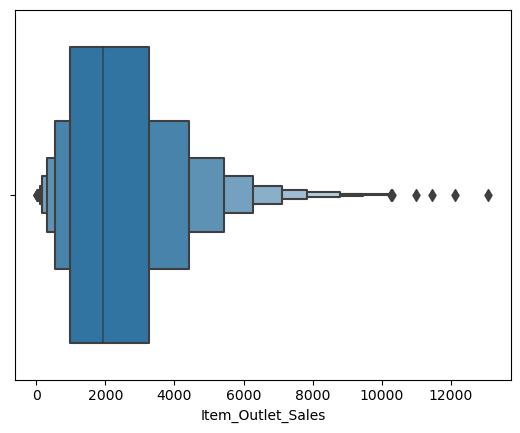

In [15]:
sns.boxenplot(data=mart,x="Item_Outlet_Sales")

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

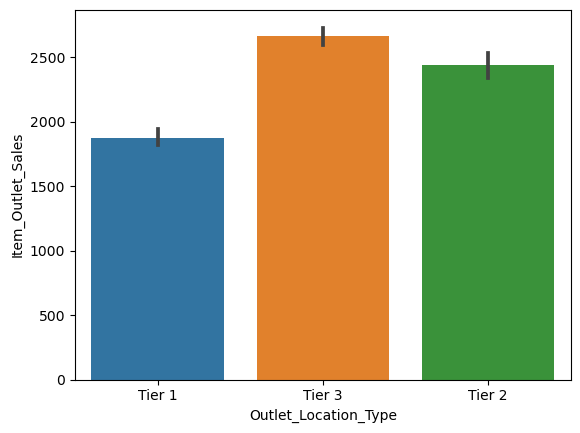

In [16]:
sns.barplot(x="Outlet_Location_Type",y='Item_Outlet_Sales',data=mart)

<AxesSubplot:>

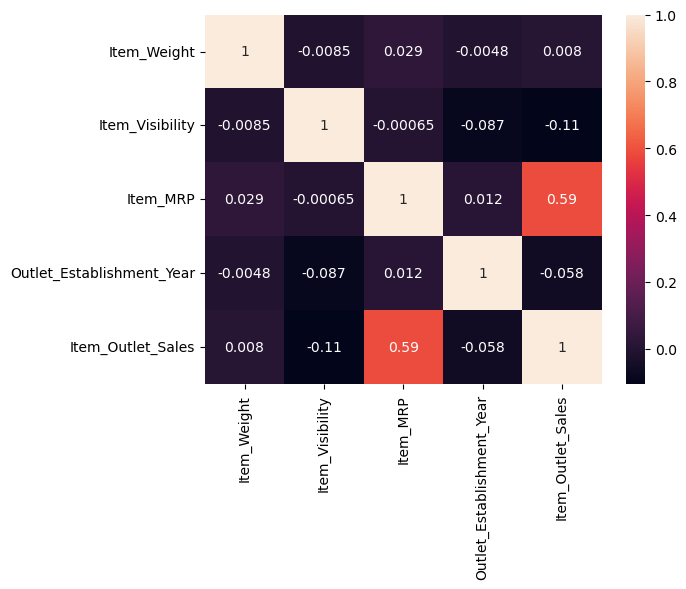

In [17]:
sns.heatmap(mart.corr(),annot=True)

In [18]:
import warnings
warnings.filterwarnings("ignore")

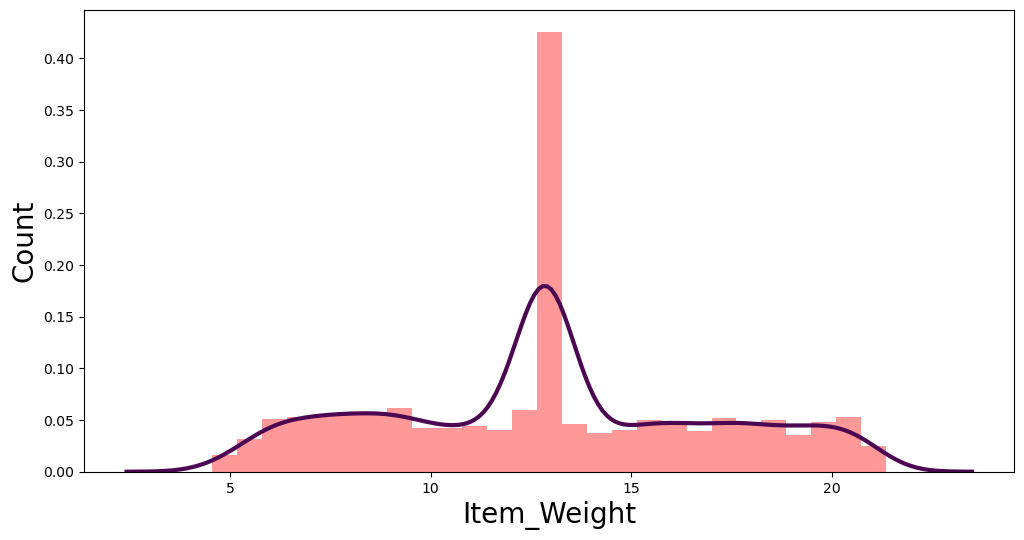

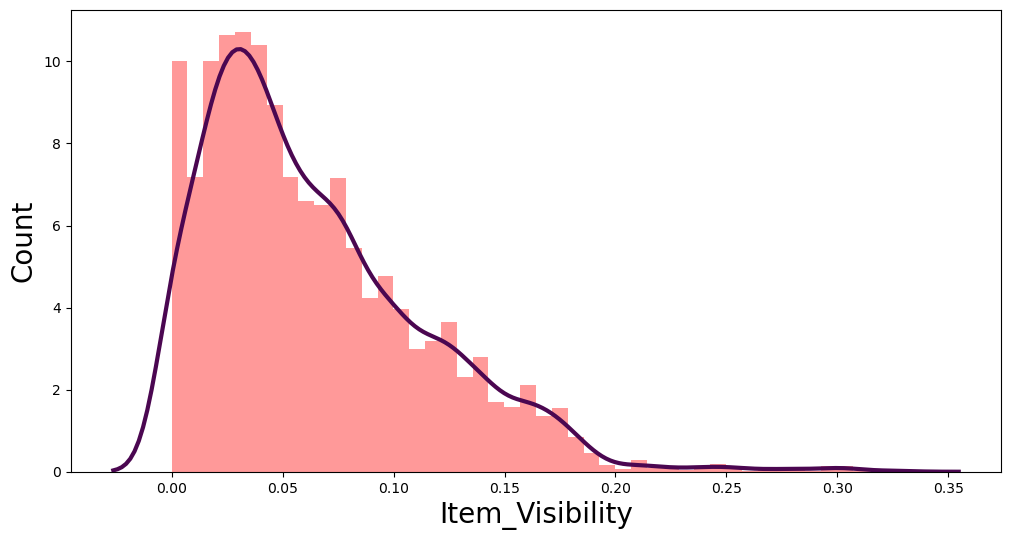

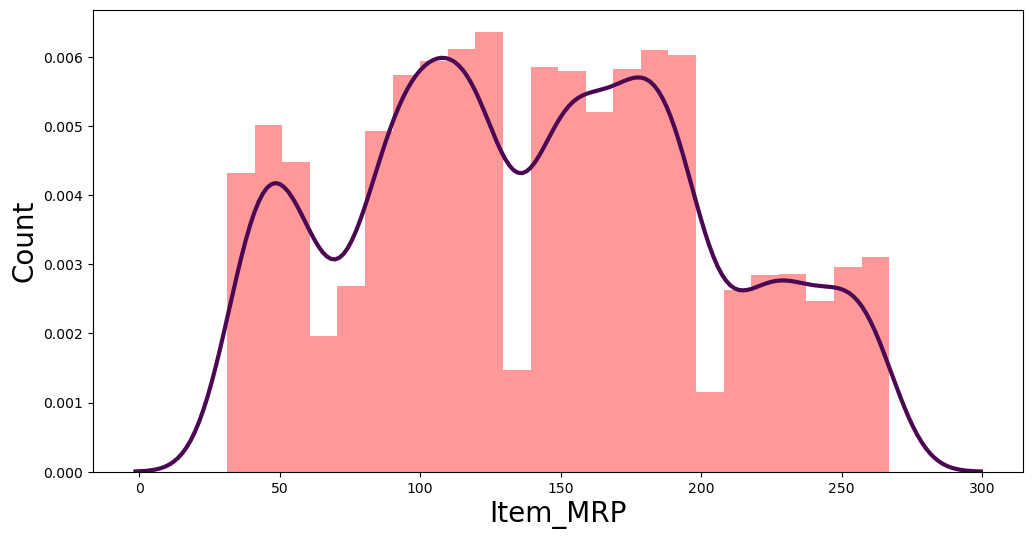

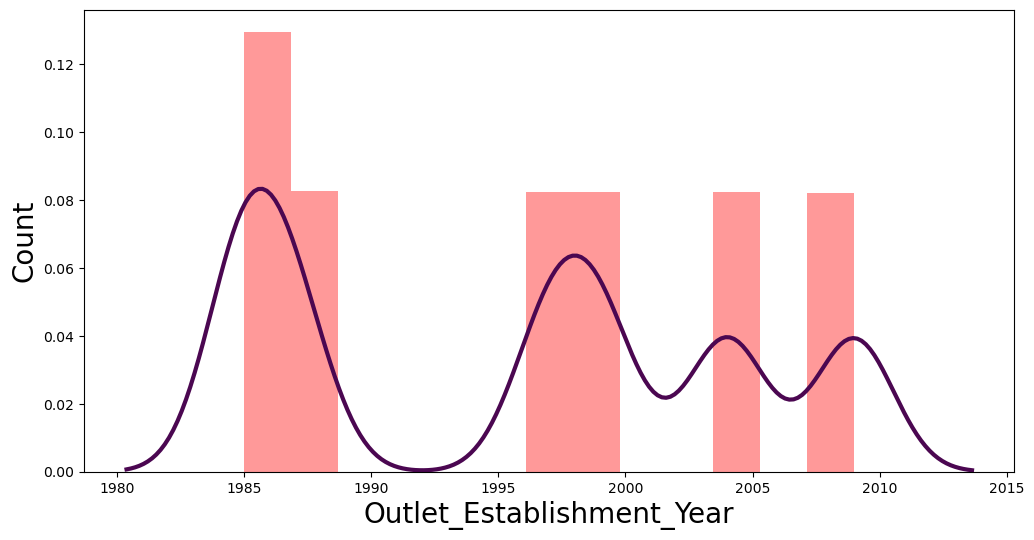

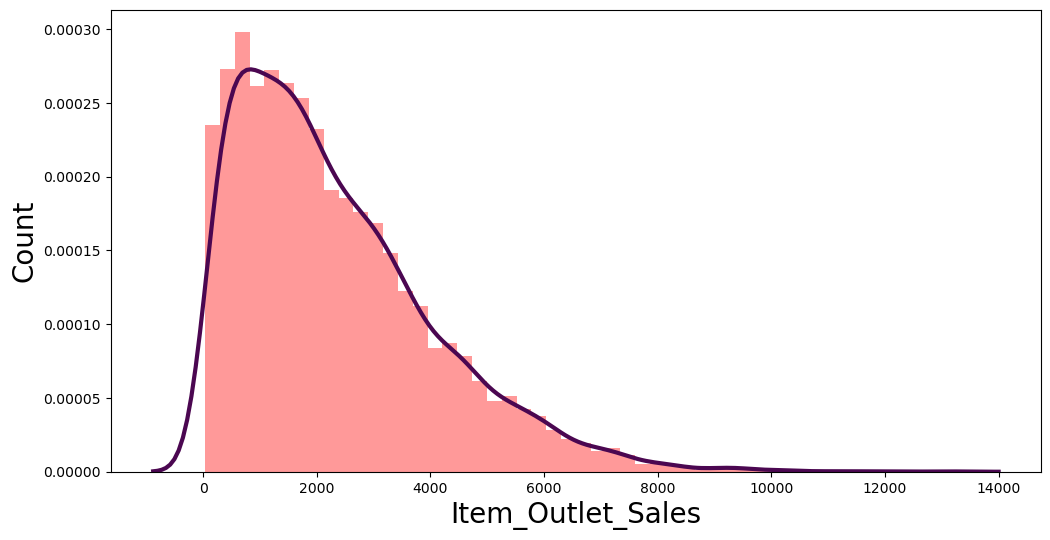

In [19]:
for feature in numerical_feature:
    dataset=mart.copy()
    fig, ax = plt.subplots(figsize=(12,6))
    sns.distplot(dataset[feature],color='r',kde_kws={'linewidth':3,'color':'#4B0751'});
    ax.set_xlabel(feature, fontsize=20)
    ax.set_ylabel("Count", fontsize=20)
    

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

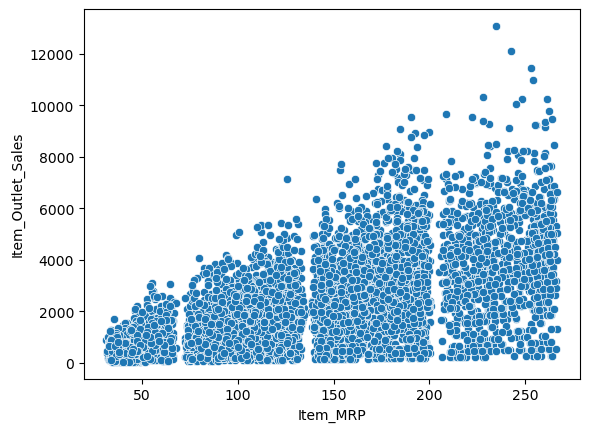

In [20]:
sns.scatterplot(x="Item_MRP",y='Item_Outlet_Sales',data=mart)

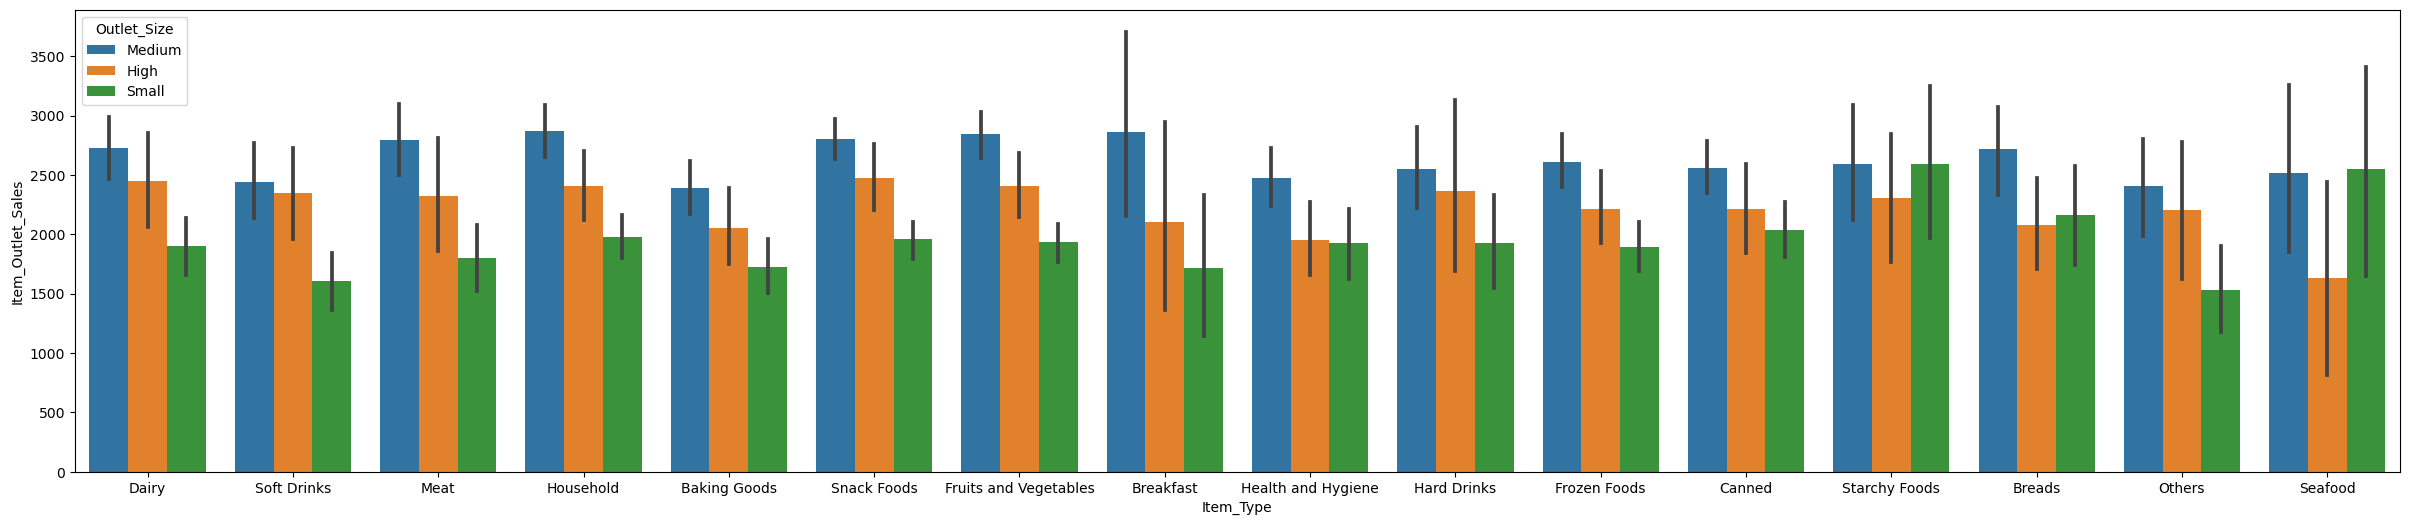

In [21]:
plt.figure(figsize=(30,6))   
sns.barplot(x="Item_Type",y="Item_Outlet_Sales",data=mart,hue="Outlet_Size")
plt.show()

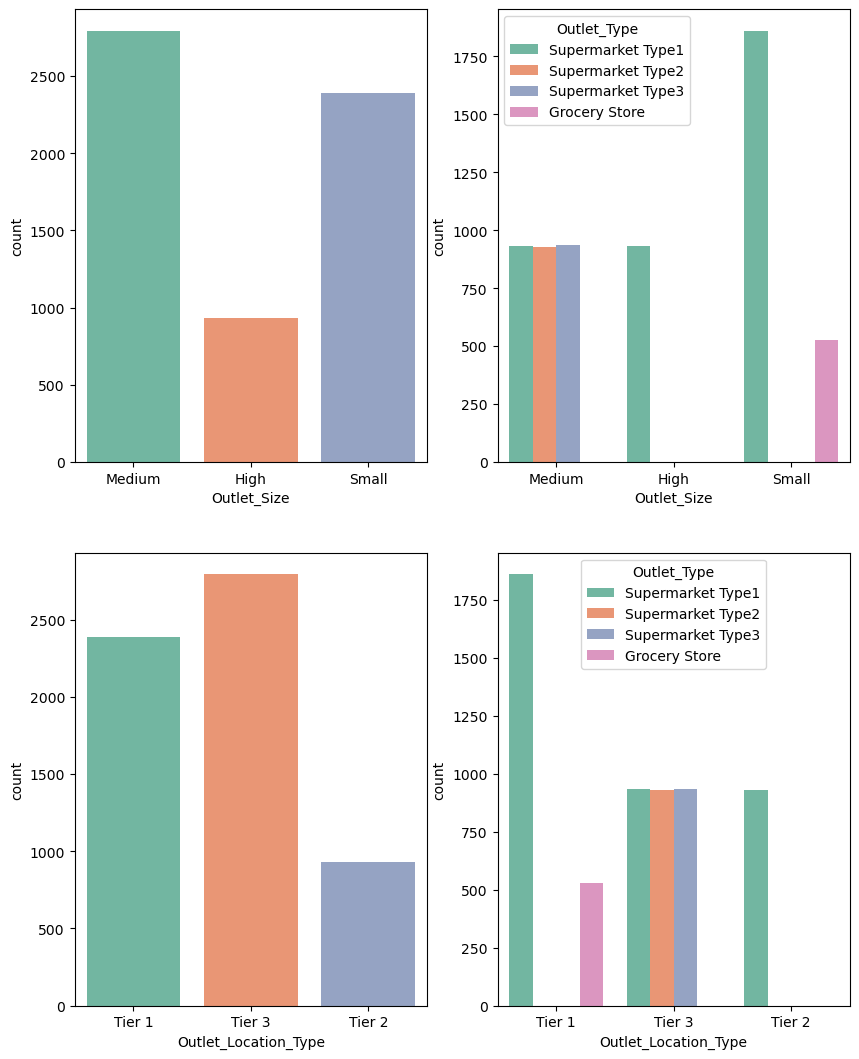

In [22]:
plt.figure(figsize=(10,20))
i=1
for col in ['Outlet_Size', 'Outlet_Location_Type']:
    plt.subplot(3,2,i)
    sns.countplot(x=col,data=mart,palette='Set2')
    i+=1
    plt.subplot(3,2,i)
    sns.countplot(x=col,hue='Outlet_Type',data=mart,palette='Set2')
    i+=1

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

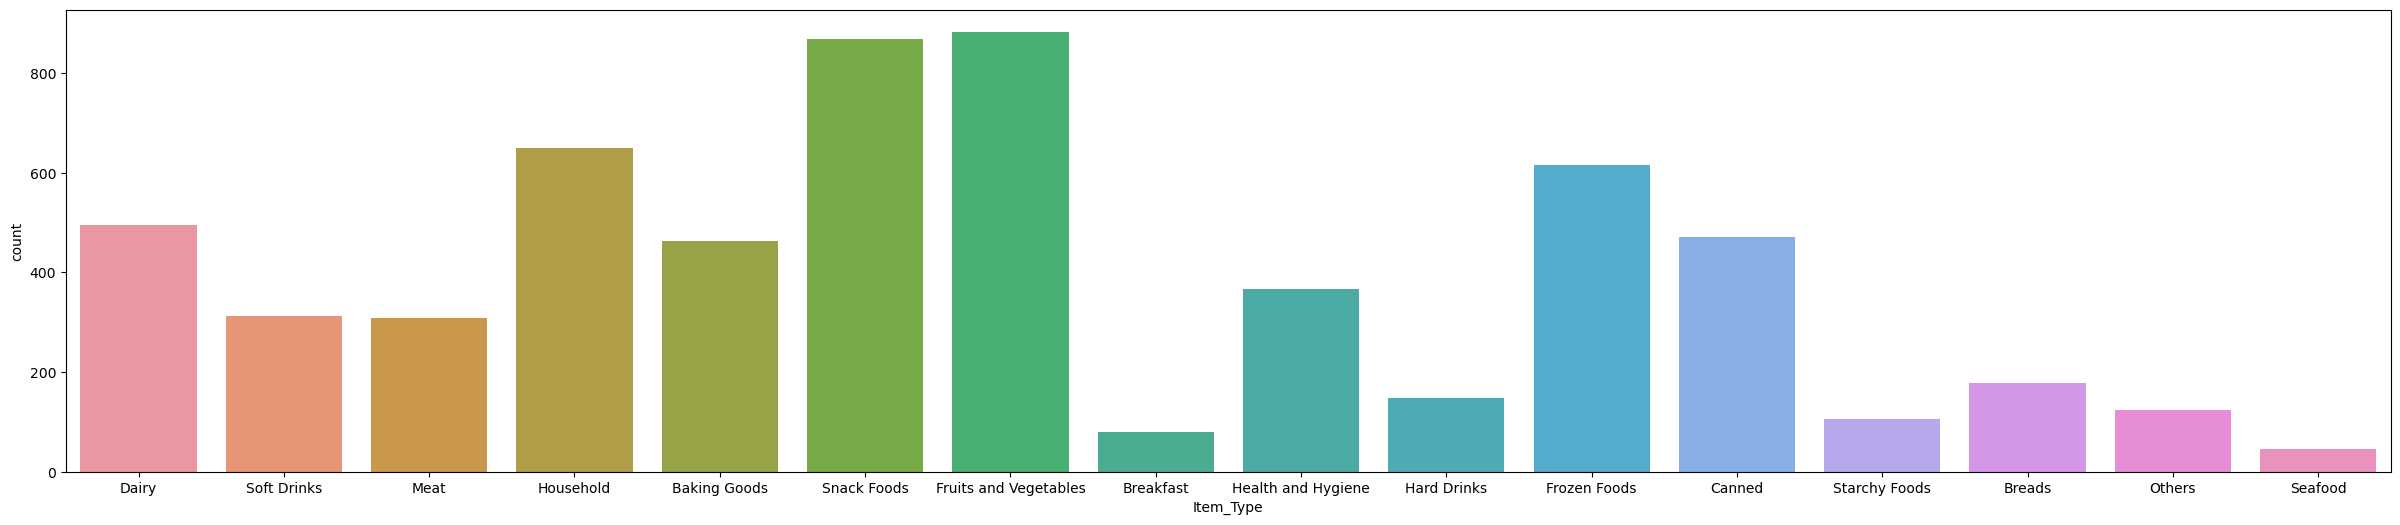

In [23]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=mart)



# Outliers

“Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.” Outliers are extreme values that deviates from the other observations in the dataset.

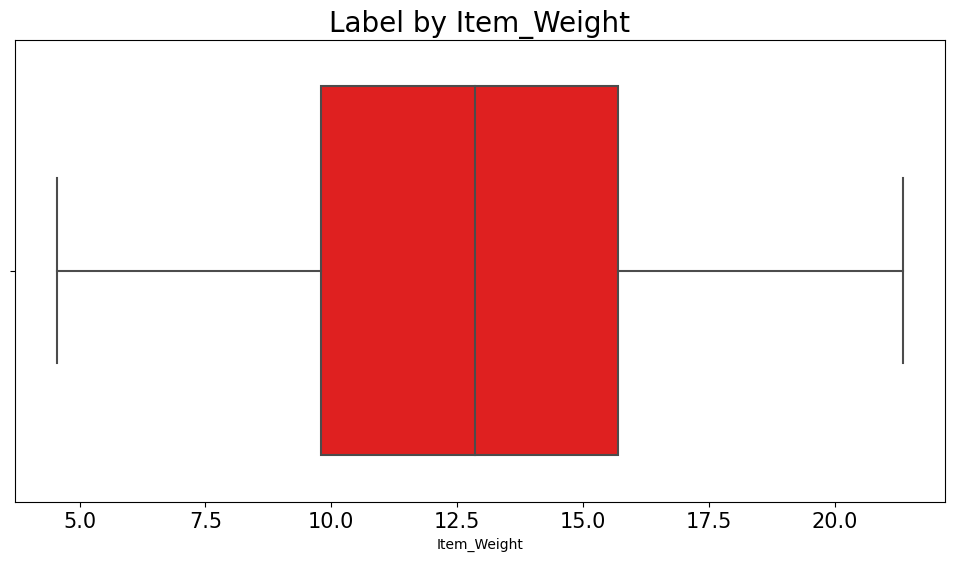

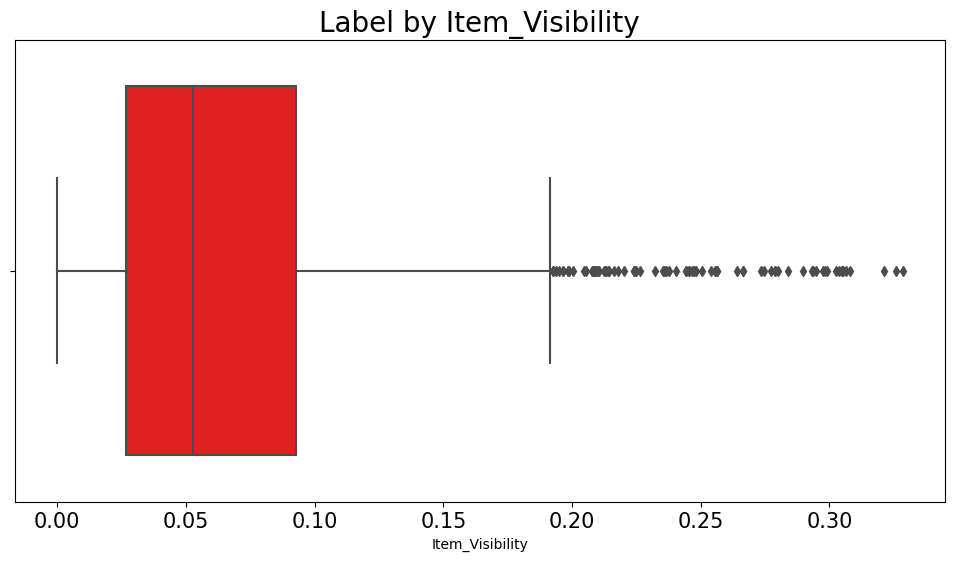

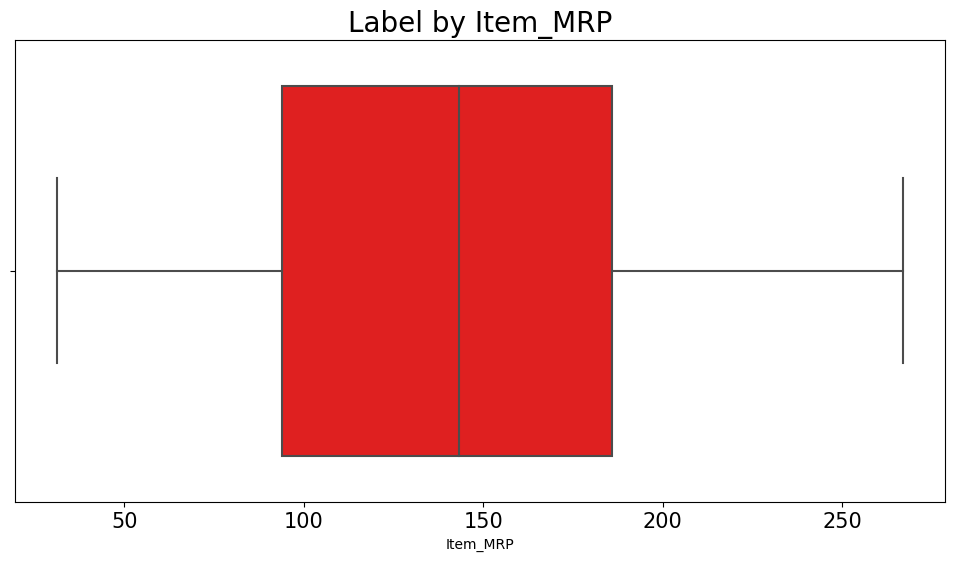

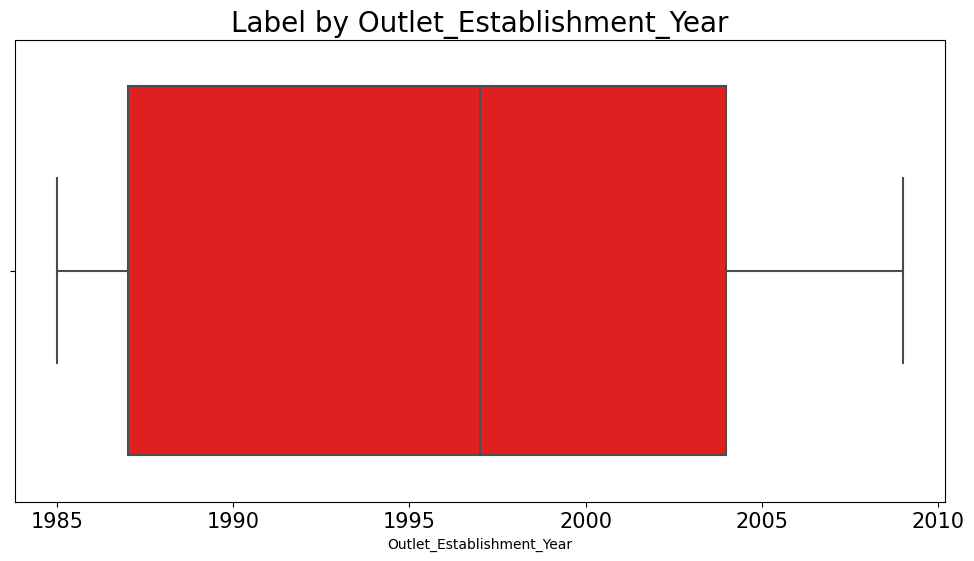

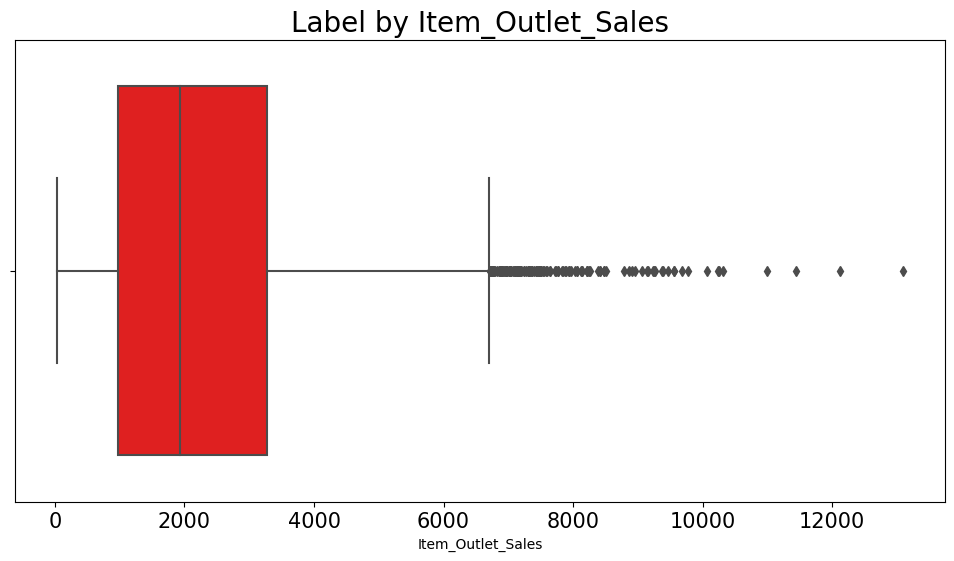

In [24]:
for col in dataset.describe().columns:
    fig, ax = plt.subplots(figsize=(12,6))
    sns.boxplot(dataset[col],color='red')
    ax.tick_params(axis='x',labelsize=15) 
    ax.tick_params(axis='y',labelsize=15)
    ax.set_title('Label by ' + col, fontsize=20) 
plt.show()

In [25]:
mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

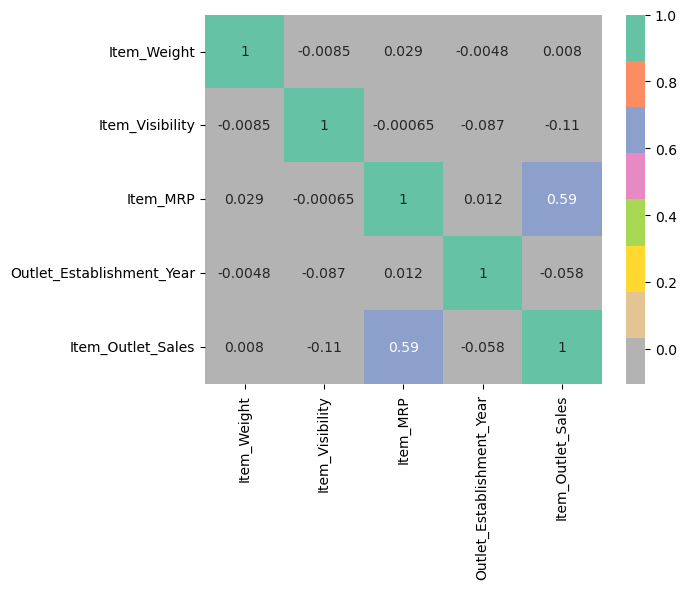

In [26]:
sns.heatmap(numerical_feature.corr(),annot=True,data=mart,cbar=True,xticklabels='auto',yticklabels='auto',linecolor='white',linewidths=0,cmap="Set2_r")

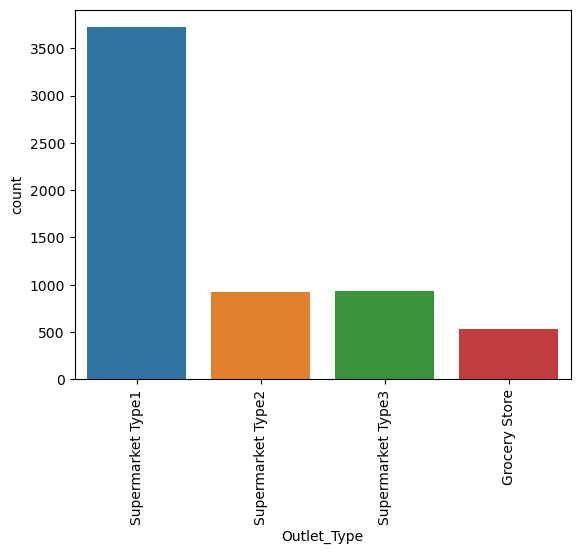

In [27]:
sns.countplot(data=mart,x='Outlet_Type')
plt.xticks(rotation = 90)
plt.show()

# grouping the data

In [28]:
mart[["Item_Weight","Item_Outlet_Sales"]].groupby(["Item_Weight"]).agg("median")

,Item_Outlet_Sales
Item_Weight,
4.555,1565.9616
4.590,1358.2320
4.610,1831.6158
4.615,4893.6300
4.635,1927.4910
...,...
21.000,1356.2346
21.100,2015.3766
21.200,2954.1546


In [29]:
mart[["Item_Fat_Content","Item_Outlet_Sales"]].groupby(["Item_Fat_Content"]).agg("median")

,Item_Outlet_Sales
Item_Fat_Content,
LF,2028.6926
Low Fat,1907.5170
Regular,1974.4299
low fat,1722.4246
reg,1598.5858


In [30]:
mart[["Item_Visibility","Item_Outlet_Sales"]].groupby(["Item_Visibility"]).agg("median")

,Item_Outlet_Sales
Item_Visibility,
0.000000,1844.2660
0.003575,3229.7958
0.003589,1691.7978
0.003598,2922.1962
0.003607,1384.1982
...,...
0.306543,291.6204
0.308145,889.5088
0.321115,199.7400


In [31]:
mart[["Item_Type","Item_Outlet_Sales"]].groupby(["Item_Type"]).agg("median")

,Item_Outlet_Sales
Item_Type,
Baking Goods,1701.7848
Breads,2055.9904
Breakfast,1561.9668
Canned,1901.5248
Dairy,1851.5898
Frozen Foods,1808.3128
Fruits and Vegetables,2022.7004
Hard Drinks,1940.1412
Health and Hygiene,1884.2140


In [32]:
mart[["Item_MRP","Item_Outlet_Sales"]].groupby(["Item_MRP"]).agg("median")

,Item_Outlet_Sales
Item_MRP,
31.2900,898.8300
31.4900,466.0600
31.8900,366.1900
31.9558,679.1160
32.0558,1018.6740
...,...
266.1884,4239.8144
266.2884,2914.8724
266.5884,3974.8260


In [33]:
mart[["Outlet_Identifier","Item_Outlet_Sales"]].groupby(["Outlet_Identifier"]).agg("median")

,Item_Outlet_Sales
Outlet_Identifier,
OUT013,2050.6640
OUT018,1655.1788
OUT019,265.3213
OUT027,3364.9532
OUT035,2109.2544
OUT046,1945.8005
OUT049,1966.1074


In [34]:
mart[["Outlet_Establishment_Year","Item_Outlet_Sales"]].groupby(["Outlet_Establishment_Year"]).agg("median")

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,1845.5976
1987,2050.6640
1997,1945.8005
1999,1966.1074
2004,2109.2544
2009,1655.1788


In [35]:
mart[["Outlet_Size","Item_Outlet_Sales"]].groupby(["Outlet_Size"]).agg("median")

,Item_Outlet_Sales
Outlet_Size,
High,2050.6640
Medium,2251.0698
Small,1544.6560


In [36]:
mart[["Outlet_Type","Item_Outlet_Sales"]].groupby(["Outlet_Type"]).agg("median")

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,265.3213
Supermarket Type1,2024.0320
Supermarket Type2,1655.1788
Supermarket Type3,3364.9532


In [37]:
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [38]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

# labelencoding 

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
Le=LabelEncoder()

In [41]:
mart["Item_Identifier"]=Le.fit_transform(mart["Item_Identifier"])
mart["Item_Fat_Content"]=mart["Item_Fat_Content"].replace({'LF':0, 'Low Fat':1, 'Regular':2, 'low fat':3, 'reg':4})

In [42]:
mart["Outlet_Identifier"]=mart["Outlet_Identifier"].replace({"OUT013":0,"OUT018":1,"OUT019":2,"OUT027":3,"OUT035":4,"OUT046":5,"OUT049":6})

In [43]:
mart["Item_Type"]=mart["Item_Type"].replace({"Fruits and Vegetables":0,"Snack Foods":1,"Household":2,"Frozen Foods":3,"Dairy":4,"Canned":5,"Baking Goods":6,"Health and Hygiene":7,"Soft Drinks":8,"Meat":8,"Breads":10,"Hard Drinks":11,"Others":12,"Starchy Foods":13,"Breakfast":14,"Seafood":15})

In [44]:
mart["Outlet_Size"]=mart["Outlet_Size"].replace({"Small":0,"Medium":1,"High":2})
mart["Outlet_Location_Type"]=mart["Outlet_Location_Type"].replace({"Tier 1":0,"Tier 2":1,"Tier 3":2})
mart["Outlet_Type"]=mart["Outlet_Type"].replace({"Grocery Store":0,"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3})

In [45]:
mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155,9.300,1,0.016047,4,249.8092,6,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,8,48.2692,1,2009,1,2,2,443.4228
2,661,17.500,1,0.016760,8,141.6180,6,1999,1,0,1,2097.2700
4,1294,8.930,1,0.000000,2,53.8614,0,1987,2,2,1,994.7052
5,757,10.395,2,0.000000,6,51.4008,1,2009,1,2,2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,388,20.750,4,0.083607,3,178.8318,5,1997,0,0,1,3608.6360
8518,369,6.865,1,0.056783,1,214.5218,0,1987,2,2,1,2778.3834
8520,1354,10.600,1,0.035186,7,85.1224,4,2004,0,1,1,1193.1136
8521,680,7.210,2,0.145221,1,103.1332,1,2009,1,2,2,1845.5976


<function matplotlib.pyplot.show(close=None, block=None)>

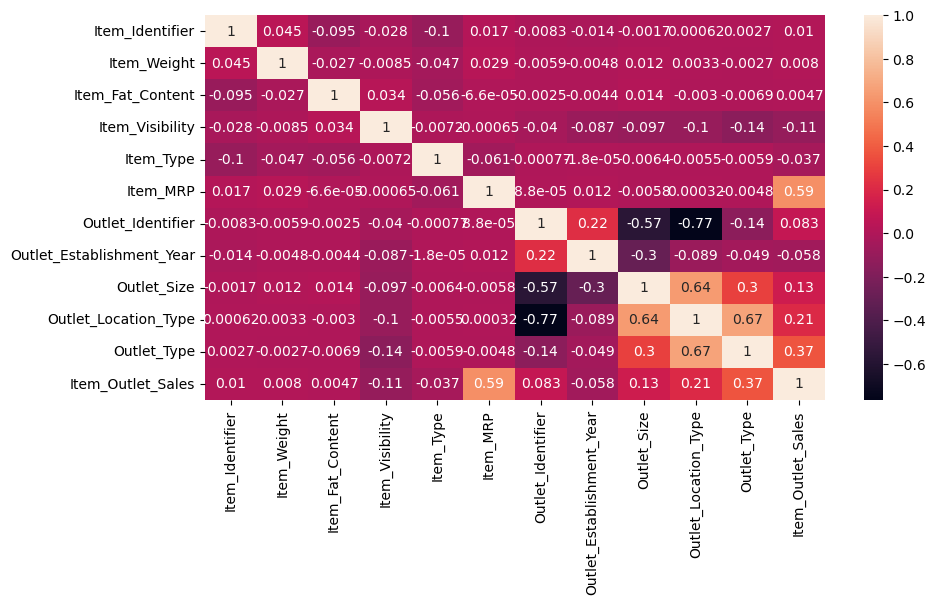

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(mart.corr(),annot=True)
plt.show

# Checking Outlier !

<AxesSubplot:>

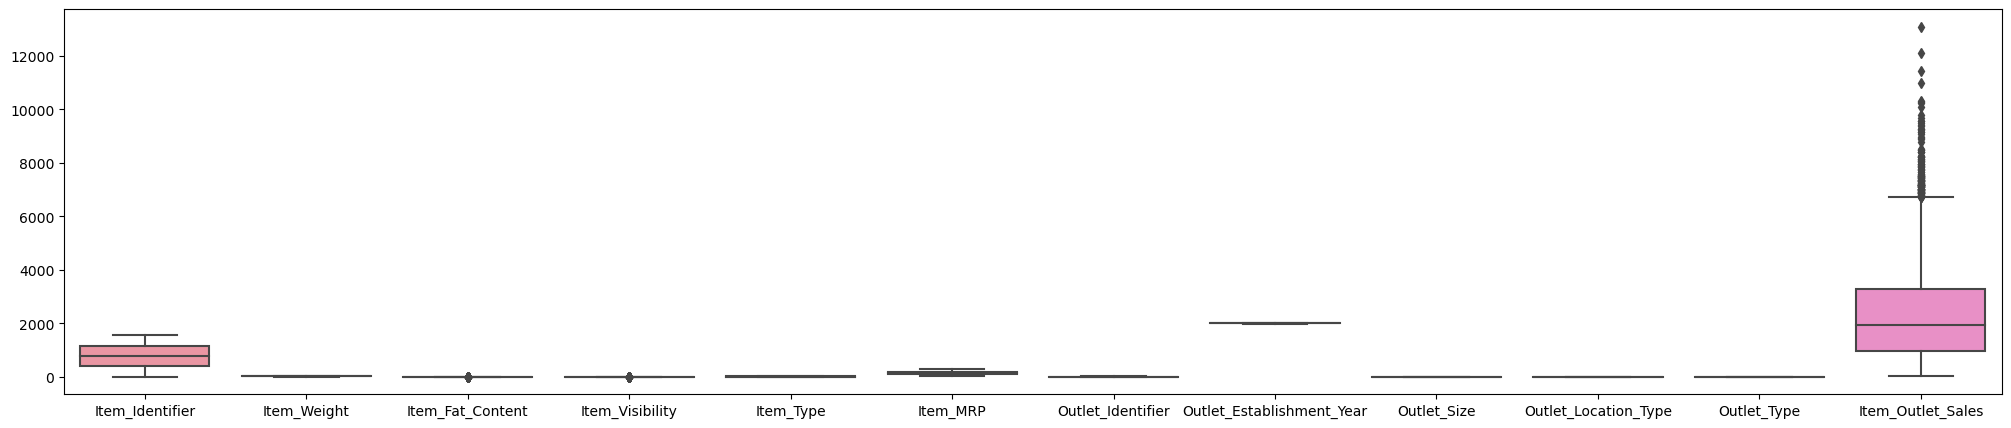

In [47]:
plt.figure(figsize=(25,5))
sns.boxplot(data=mart)

In [48]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   int32  
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   int64  
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   int64  
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   int64  
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   int64  
 9   Outlet_Location_Type       6113 non-null   int64  
 10  Outlet_Type                6113 non-null   int64  
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int32(1), int64(7)
memory usage: 597.0 KB


In [49]:
mart.drop(["Item_Identifier","Item_Visibility","Outlet_Establishment_Year"],axis=1,inplace=True)

<AxesSubplot:>

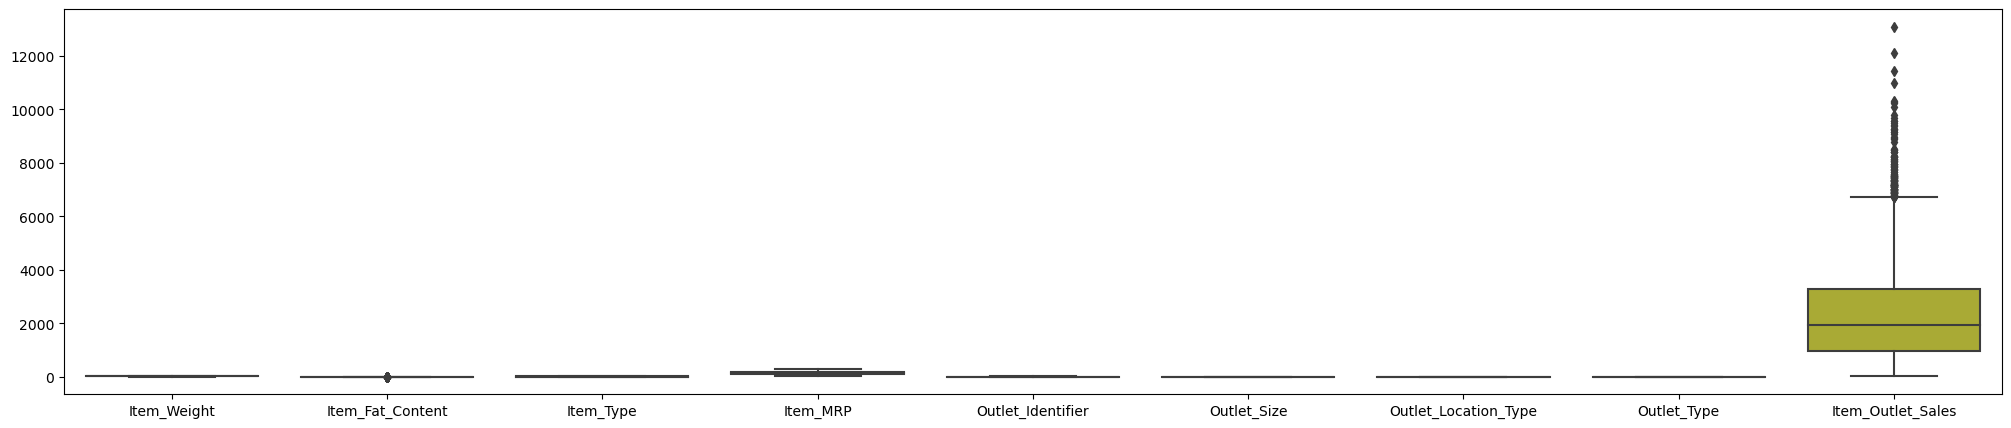

In [50]:
plt.figure(figsize=(25,5))
sns.boxplot(data=mart)

<AxesSubplot:>

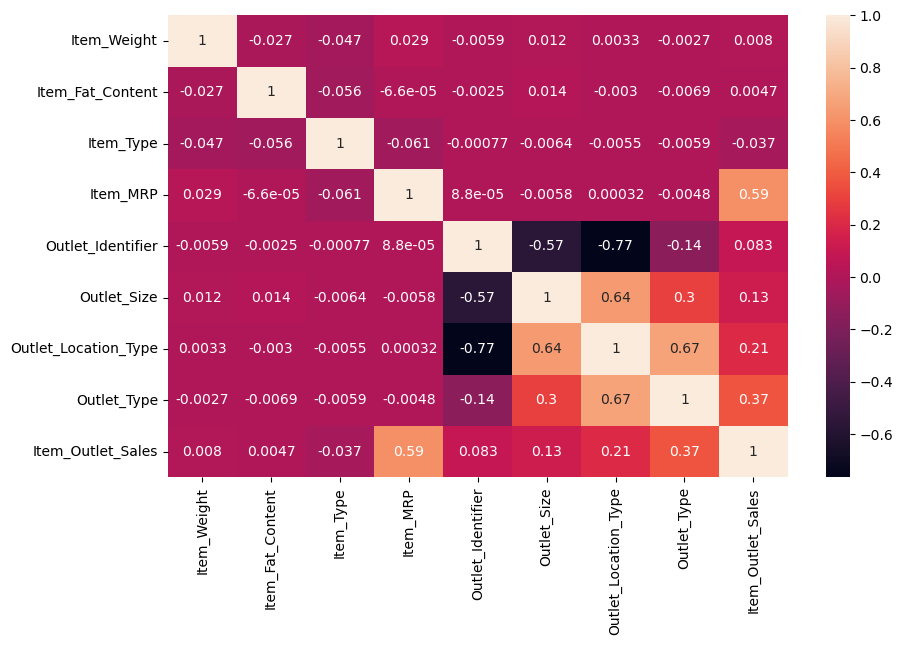

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(mart.corr(),annot=True)

In [52]:
X=mart.drop("Item_Outlet_Sales",axis=1)
Y=mart["Item_Outlet_Sales"]

In [53]:
test_X=X.iloc[0:500]
test_Y=Y.iloc[0:500]
#testing only first 500

In [54]:
from sklearn.metrics import r2_score

In [55]:
score={}

# RANDOM FOREST REGRESSOR

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf=RandomForestRegressor(n_estimators=500)

In [58]:
rf.fit(X,Y)

RandomForestRegressor(n_estimators=500)

In [59]:
rf_pred=rf.predict(test_X)

In [60]:
r2_score(test_Y,rf_pred)

0.939023238479339

# XGBOOST

In [61]:
# pip install xgboost

In [62]:
import xgboost as xg

In [63]:
xgb=xg.XGBRegressor(n_estimators=500)

In [64]:
xgb.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
xgb_pred=xgb.predict(test_X)

In [66]:
r2_score(test_Y,xgb_pred)

0.9774015892942607

In [67]:
import pickle

In [68]:
 pickle.dump(xgb,open(r"model.pkl","wb"))

In [69]:
import sklearn

In [72]:
import streamlit as st

In [71]:
# pip install streamlit